# Homework 1: Regression (50 points)

**Reading**: Data8 textbook chapters [15](https://www.inferentialthinking.com/chapters/15/Prediction) and [16](https://www.inferentialthinking.com/chapters/16/Inference_for_Regression.html).

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the needed functions. Each time you start your server, you will need to execute this cell again to load them.  

Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged.
 
Homework 1 is due **Friday, April 8 at 6:00pm**.   You should start early so that you have time to get help if you're stuck. 

In [ ]:
# Worked with Kenley Ambroise, Adil Kassim

In [137]:
# Don't change this cell; just run it. 
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [138]:
# This notebook uses global.1751_2014.csv, co2_annmean_mlo.csv , btc.csv, eth.csv, and triple_vertical.csv 

In [139]:
# Let us examine the Mona Loa atmospheric composition timeseries.
#  Dr. Pieter Tans, "Trends in Atmospheric Carbon Dioxide."  NOAA/GML (gml.noaa.gov/ccgg/trends/) and Dr. Ralph Keeling, Scripps Institution of Oceanography (scrippsco2.ucsd.edu/). 
# The data product we're after is the annual mean CO2 from 1960 to 2021:
# https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv


In [140]:
co = pd.read_csv("co2_annmean_mlo.csv", comment="#")
co["Mean"] = co["mean"]  # .mean() is a method 

In [141]:
# Table of data points from co2_annmean_mlo.csv
co

,year,mean,unc,Mean
0,1959,315.98,0.12,315.98
1,1960,316.91,0.12,316.91
2,1961,317.64,0.12,317.64
3,1962,318.45,0.12,318.45
4,1963,318.99,0.12,318.99
...,...,...,...,...
58,2017,406.76,0.12,406.76
59,2018,408.72,0.12,408.72
60,2019,411.66,0.12,411.66
61,2020,414.24,0.12,414.24


In [85]:
# Let's see some basic statistics of co
co.describe()

,year,mean,unc,Mean
count,63.000000,63.000000,6.300000e+01,63.000000
mean,1990.000000,357.339048,1.200000e-01,357.339048
std,18.330303,29.850267,9.792480e-17,29.850267
min,1959.000000,315.980000,1.200000e-01,315.980000
25%,1974.500000,330.655000,1.200000e-01,330.655000
50%,1990.000000,354.450000,1.200000e-01,354.450000
75%,2005.500000,381.035000,1.200000e-01,381.035000
max,2021.000000,416.450000,1.200000e-01,416.450000


Text(0, 0.5, 'atmospheric CO$_2$ at Mona Loa\n ppm in dry air')

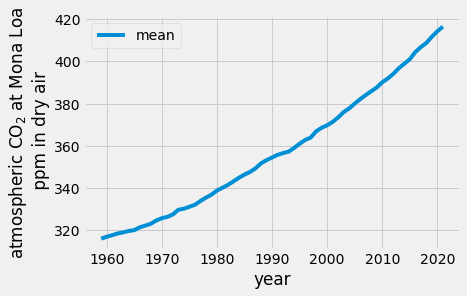

In [86]:
co.plot("year", "mean")
plt.ylabel("atmospheric CO$_2$ at Mona Loa\n ppm in dry air")

In [87]:
# The briefest glance at this graph shows the measured quantity is increaing.
# A second glance shows that slope is increasing.  

**Question 1**  find and plot simple least-squares fit lines for the mean atmospheric
CO$_2$ data for the entire timeseries and for the first half ( 1959-1990) and second half(1991-2021).
For this problem, calculate the maximum-likelihood least-squares coefficients without using 
library functions for least-squares estimation.

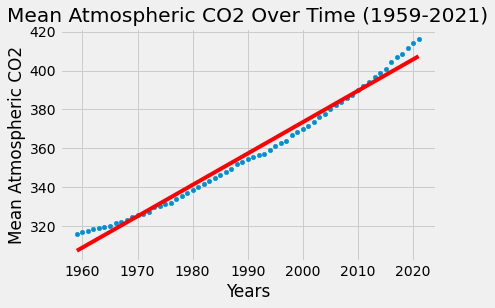

In [163]:
# plotting entire timeseries
co.plot("year", "mean", kind = "scatter")
# function that finds covariance
def covariance (x, y):
    """Calculates the covariance given x and y values"""
    cova = np.sum((y-np.mean(y))*(x-np.mean(x)))/len(x)
    return cova

# function that finds variance --> wasn't needed
# def variance (x):
    #"""Calculates the variance given x values"""
    #vari = np.sum(x-np.mean(x))**2/len(x)
    #return vari
    
# function to find regression coefficients m and b
def reg_coeff (x, y):
    """Calculates m (b1) and b (b0) to perform least-squares regression"""
    m = covariance(x,y)/np.var(x)
    b = np.mean(y)-(m*np.mean(x))
    return m, b

# Calls coefficient function
coefficients = reg_coeff(co["year"], co["mean"])

# Plotting least squares regression
x = co["year"]
y = co["mean"]
plt.plot(x, coefficients[0]*x + coefficients[1], color = "red")
plt.xlabel('Years')
plt.ylabel('Mean Atmospheric CO2')
plt.title("Mean Atmospheric CO2 Over Time (1959-2021)")
plt.show()

In [106]:
# Looking at what the actual coefficients are for the regression line
coefficients = reg_coeff(co["year"], co["mean"])
coefficients

(1.6141181835637477, -2854.7561376728104)

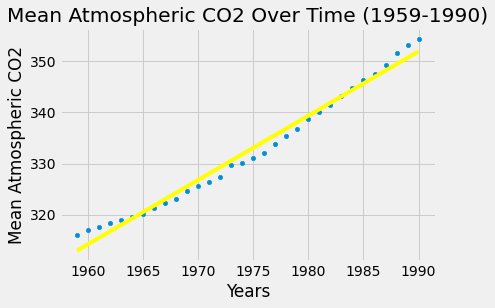

In [167]:
# Plot first half of time series (1959-1990)

# Need to filter data set
ihalf_co = co.loc[0:31]

# Plotting filtered data set
ihalf_co.plot("year", "mean", kind = "scatter")

# Call coefficient function
coefficients = reg_coeff(ihalf_co["year"], ihalf_co["mean"])

# Plotting least squares regression
x = ihalf_co["year"]
y = ihalf_co["mean"]
plt.plot(x, coefficients[0]*x + coefficients[1], color = "yellow")
plt.xlabel('Years')
plt.ylabel('Mean Atmospheric CO2')
plt.title("Mean Atmospheric CO2 Over Time (1959-1990)")
plt.show()

In [107]:
# Looking at what the actual coefficients are for the regression line
coefficients = reg_coeff(ihalf_co["year"], ihalf_co["mean"])
coefficients

(1.2587921554252197, -2153.035423387096)

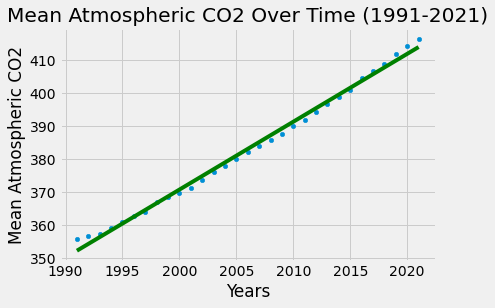

In [166]:
# Plot second half of time series (1991-2021)

# Need to filter data set
fhalf_co = co.loc[32:62]

# Plotting filtered data set
fhalf_co.plot("year", "mean", kind = "scatter")

# Call coefficient function
coefficients = reg_coeff(fhalf_co["year"], fhalf_co["mean"])

# Plotting least squares regression
x = fhalf_co["year"]
y = fhalf_co["mean"]
plt.plot(x, coefficients[0]*x + coefficients[1], color = "green")
plt.xlabel('Years')
plt.ylabel('Mean Atmospheric CO2')
plt.title("Mean Atmospheric CO2 Over Time (1991-2021)")
plt.show()

In [168]:
# Looking at what the actual coefficients are for the regression line
coefficients = reg_coeff(fhalf_co["year"], fhalf_co["mean"])
coefficients

(2.0576008064516134, -3744.515927419355)

**Question 2**  What do the slopes mean?  Estimate the year the atmosphere will 
pass the 560 ppm "doubling of preindustrial atmospheric carbon" landmark.  


In [110]:
# The slopes mean that they are a prediction of the mean ppm of CO2 released into the atmosphere.
# These slopes are calculated to have the least residuals between the predicted data points and
#the observed data points.

# Using the best fit function, I would predict that the year the atmosphere will pass 560 ppm
#will be the year 2115 (rounded to the nearest whole year) using the linear regression 
#coefficients from the entire time series.

year = (560-(-2854.7561376728104))/1.6141181835637477
year


2115.5552130225715

Remember the calculus operation to find slopes is differentiation, but 
this is data sampled at regular intervals, not a continuous function, so
we can approximate the derivative with finite differences:

`np.diff(y) / np.diff(x)` gives us n-1 estimates of dy/dx.

(Why is it n-1?)


Text(0, 0.5, 'mean CO$_2$ difference\n ppm year-over-year')

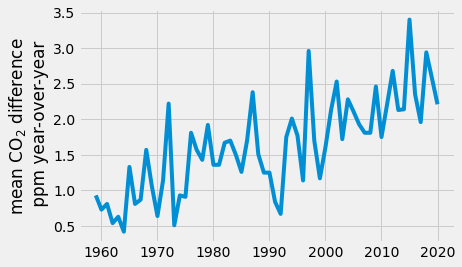

In [73]:
plt.plot(co.year[:-1], np.diff(co["Mean"]))
plt.ylabel("mean CO$_2$ difference\n ppm year-over-year")

In [74]:
early = co.query("year < 1990")
late = co.query("year >=1990 & year < 2021")
len(early), len(late)

(31, 31)

Text(0, 0.5, 'Global Carbon (MMT), estimated')

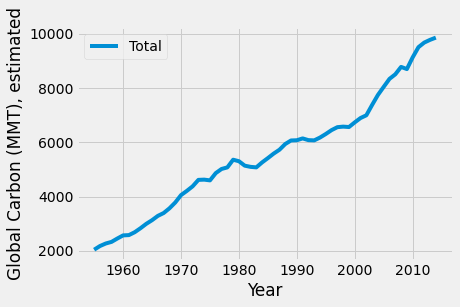

In [72]:
# There isn't a big mystery about where this excess carbon dioxide 
# is coming from, it's human economic activity tied to the production
# of energy and construction materials.

# Boden, T.A., Marland, G., and Andres, R.J. (2017). 
# Global, Regional, and National Fossil-Fuel CO2 Emissions. Carbon Dioxide Information 
# Analysis Center, Oak Ridge National Laboratory, U.S. Department of Energy, 
# Oak Ridge, Tenn., U.S.A. doi 10.3334/CDIAC/00001_V2017.
    
emissions = pd.read_csv("global.1751_2014.csv", comment="#", sep="\t")

emissions[-60:].plot("Year", "Total")
plt.ylabel("Global Carbon (MMT), estimated")

In [111]:
# What does this table look like?
emissions

,Year,Total,Gas,Liquids,Solids,Cement Production,Gas Flaring,Per Capita
0,1751,3,0,0,3,0,0,NaN
1,1752,3,0,0,3,0,0,NaN
2,1753,3,0,0,3,0,0,NaN
3,1754,3,0,0,3,0,0,NaN
4,1755,3,0,0,3,0,0,NaN
...,...,...,...,...,...,...,...,...
259,2010,9128,1696,3107,3812,446,67,1.32
260,2011,9503,1756,3134,4055,494,64,1.36
261,2012,9673,1783,3200,4106,519,65,1.36
262,2013,9773,1806,3220,4126,554,68,1.36


In [112]:
# What are some basic statistics?
emissions.describe()

,Year,Total,Gas,Liquids,Solids,Cement Production,Gas Flaring,Per Capita
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,65.000000
mean,1882.500000,1522.984848,209.166667,536.609848,721.541667,41.723485,13.969697,1.068308
std,76.354437,2444.152273,439.181345,984.092272,949.056349,99.373720,27.029892,0.184574
min,1751.000000,3.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.650000
25%,1816.750000,13.750000,0.000000,0.000000,13.750000,0.000000,0.000000,0.970000
50%,1882.500000,264.000000,0.000000,4.000000,260.500000,0.000000,0.000000,1.110000
75%,1948.250000,1431.500000,77.250000,362.500000,1064.750000,14.500000,0.000000,1.180000
max,2014.000000,9855.000000,1823.000000,3280.000000,4126.000000,568.000000,110.000000,1.360000


**Question 3** 
Find a simple-least-squares regression line for the relationship between year-over-year 
atmospheric CO$_2$ concentration difference and the estimated world production of CO$_2$.
Interpret the slope coefficient.

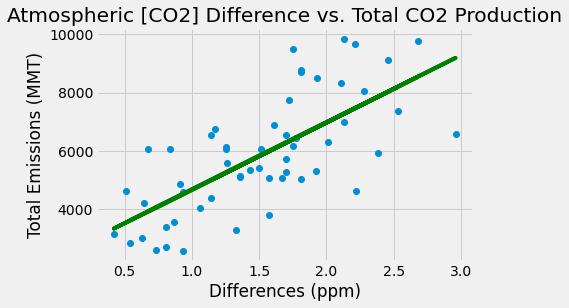

In [127]:
# Do I need to standardize all the units?

# How do I account for different domain lengths?
plt.plot(np.diff(co["Mean"][:-7]), emissions.Total[-55:], 'o')

# Calling coefficients function
x = np.diff(co["Mean"][:-7])
y = emissions["Total"][-55:]
coefficients = reg_coeff(x, y)

# Plotting least squares line
plt.plot(x, coefficients[0]*x + coefficients[1], color = "green")
plt.xlabel('Differences (ppm)')
plt.ylabel('Total Emissions (MMT)')
plt.title("Atmospheric [CO2] Difference vs. Total CO2 Production")
plt.show()

In [125]:
x = np.diff(co["Mean"][:-7])
y = emissions["Total"][-55:]
coefficients = reg_coeff(x, y)
coefficients
# Interpret the slope coeficients
# There is a positive correlation (or positive slope), as total amount of CO2 increases, 
#the differences in atmospheric concentrations of CO2 increases too indicating a direct 
#relationship based on the best fit line, and that when the difference increases by 0.5 the 
#total amount of CO2 production increases by over ~1,150 MMT based on the least squares model.

(2308.1271754963823, 2361.497062238271)

## 2. Triple Jump Distances vs. Vertical Jump Heights (15 points)

Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (an horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data into a pandas data frame.


In [76]:
jumps_df = pd.read_csv('triple_vertical.csv')
jumps_df.head(5)

,triple,vertical
0,383.00,33.00
1,781.00,71.10
2,561.62,62.25
3,624.52,61.33
4,446.24,40.19


#### Question 4
Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis **that also shows: (i) the least squares line; and (ii) the least absolute deviations line (minimizing MAE)**.  

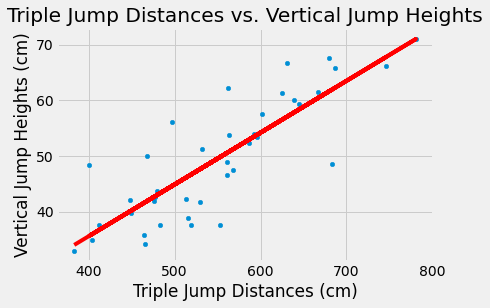

TypeError: mae() takes 1 positional argument but 2 were given

In [188]:
# Plotting scatter plot of jumps
jumps_df.plot("triple", "vertical", kind = "scatter")

# Calling coefficients function
coefficients = reg_coeff(jumps_df["triple"], jumps_df["vertical"])

# Plotting least squares line
x = jumps_df["triple"]
y = jumps_df["vertical"]
plt.plot(x, coefficients[0]*x + coefficients[1], color = "red")
plt.xlabel('Triple Jump Distances (cm)')
plt.ylabel('Vertical Jump Heights (cm)')
plt.title("Triple Jump Distances vs. Vertical Jump Heights")
plt.show()

# Function to find absolute deviations
def mae(some_slope_intercept):
    """Calculates MAE for given slope and intercept - input is an array or list
    a[0] is slope
    a[1] is intercept.
    Usage: mae = housing_mae ( [ m, b] )"""
    m = some_slope_intercept[0]
    b = some_slope_intercept[1]
    sum_mae = 0
    for i in range(40):
        sum_mae += abs(jumps_df["vertical"][i] - ((slope * jumps_df["triple"][i]) + y_int))
    return sum_mae / 40

res = scipy.optimize.minimize(mae, jumps_df["triple"], jumps_df["vertical"])
optimized_slope = res["x"][0]
opt_y_int = res["x"][1]

# Plotting absolute deviations line

NameError: name 'MAE' is not defined

##### Question 5
Create a function called `regression_parameters`. It takes as its argument a data frame with two columns.  The first column is the predictor (x-variable), and the second column is the response variable (y-variable). It should compute the correlation between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters).  It should return an array with three elements: the correlation coefficient of the two columns, the slope of the regression line, and the intercept of the regression line.

In [152]:
# Create regression_parameters function
def regression_parameters(df):
    """Takes a dataframe with 2 columns and returns 2 variables x and y"""
    x = df['x']
    y = df['y']
    def standard_units(x):
        "Convert any array of numbers to standard units."
        return (x - np.average(x))/np.std(x,ddof=1)
    # Our solution had 4 lines above this one; you may use more or less than that
    r = sum(standard_units(x) * standard_units(y))/ (len(df)-1)
    slope = r * (np.std(y)/np.std(x))
    intercept = np.average(y) - (slope * np.average(x))
    return np.array([r, slope, intercept])

# When your function is finished, the next lines should
# compute the regression line predicting vertical jump 
# distances from triple jump distances. Set parameters
# to be the result of calling regression_parameters appropriately.
parameters = regression_parameters(pd.DataFrame({'x':x,'y':y}))
print('r:', parameters.item(0), '; slope:', parameters.item(1), '; intercept:', parameters.item(2))

r: 0.8343076972837594 ; slope: 0.0929572816051218 ; intercept: -1.5665209729634526


#### Question 6
Let's use `parameters` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be?

In [154]:
triple_record_vert_est = parameters.item(1) * (18.29 * 100) + parameters.item(2)
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

Predicted vertical jump distance: 168.452347 centimeters


#### Question 7
Do you expect this estimate to be accurate within a few centimeters? Why or why not?


It's difficult to tell because triple jump distances are higher compred to triple jump distances. Perhaps the vertical jump converges at a specific height that is limited by the human body. Thus, though the data fits the linear regression, it is rather because that is what the regression is meant to do rather than because a triple jump distance of such height actually corresponds linearly to the vertical jump height.

## 3. Cryptocurrencies (21 points)

Imagine you're an investor in December 2017. Cryptocurrencies, online currencies backed by secure software, are becoming extremely valuable, and you want in on the action!

The two most valuable crpytocurrencies are Bitcoin (BTC) and Ethereum (ETH). Each one has a dollar price attatched to it at any given moment in time. For example, on December 1st, 2017, one BTC costs $\$$10859.56 and one ETH costs $\$$424.64. 

**You want to predict the price of ETH at some point in time based on the price of BTC.** 

There is a larger datset on [Kaggle](https://www.kaggle.com/jessevent/all-crypto-currencies/data) from which we obtained two tables called `btc` and `eth`. Each has 5 columns:
* `date`, the date
* `open`, the value of the currency at the beginning of the day
* `close`, the value of the currency at the end of the day
* `market`, the market cap or total dollar value invested in the currency
* `day`, the number of days since the start of our data

In [189]:
btc_df=pd.read_csv('btc.csv')
btc_df.head(10)

,date,open,close,market,day
0,2015-09-29,239.02,236.69,3505090000,1
1,2015-09-30,236.64,236.06,3471280000,2
2,2015-10-01,236.00,237.55,3462800000,3
3,2015-10-02,237.26,237.29,3482190000,4
4,2015-10-03,237.20,238.73,3482100000,5
5,2015-10-04,238.53,238.26,3502460000,6
6,2015-10-05,238.15,240.38,3497740000,7
7,2015-10-06,240.36,246.06,3531230000,8
8,2015-10-07,246.17,242.97,3617400000,9
9,2015-10-08,243.07,242.30,3572730000,10


In [190]:
eth_df=pd.read_csv('eth.csv')
eth_df.head(10)

,date,open,close,market,day
0,2015-09-29,0.579414,0.661146,42607700,1
1,2015-09-30,0.661192,0.738644,48636600,2
2,2015-10-01,0.734307,0.690215,54032300,3
3,2015-10-02,0.683732,0.678574,50328700,4
4,2015-10-03,0.678783,0.687171,49981900,5
5,2015-10-04,0.686343,0.668379,50556000,6
6,2015-10-05,0.666784,0.628643,49131600,7
7,2015-10-06,0.622218,0.650645,45863300,8
8,2015-10-07,0.650515,0.609388,47964700,9
9,2015-10-08,0.609501,0.621716,44955900,10


#### Question 8

In some of the questions below, we will need to pair the daily 'btc' and 'eth' price data. A simple way is to use the corresponding columns in the two data frames (assuming that they correspond to the same dates). Verify that all the rows in the two data frames correspond to the same dates. You can see this for the first 10 observations by looking at the date columns above.



In [191]:
# 
len(eth_df.loc[(eth_df['date'] == btc_df["date"])].index) / len(eth_df)

1.0


#### Question 9

In the cell below, make one or two plots to investigate the opening prices of BTC and ETH as a function of time. Then comment on whether you think the values are correlated.

Text(0.5, 1.0, 'Opening Prices of BTC vs. Time')

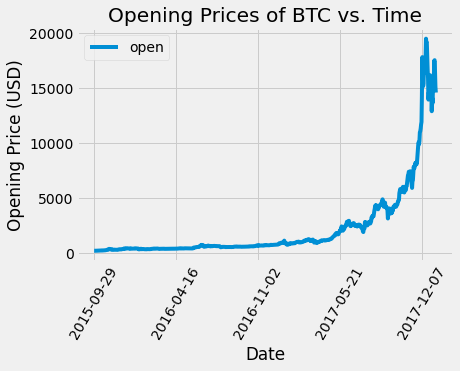

In [192]:
# Plotting BTC
btc_df.plot("date", "open")
plt.xlabel("Date")
plt.xticks(rotation=60)
plt.ylabel("Opening Price (USD)")
plt.title("Opening Prices of BTC vs. Time")

# Based on the plot of opening prices of bitcoin over time I believe that there is a positive
#exponential(?) correlation between opening price and time because the line increases positively

Text(0.5, 1.0, 'Opening Prices of ETH vs. Time')

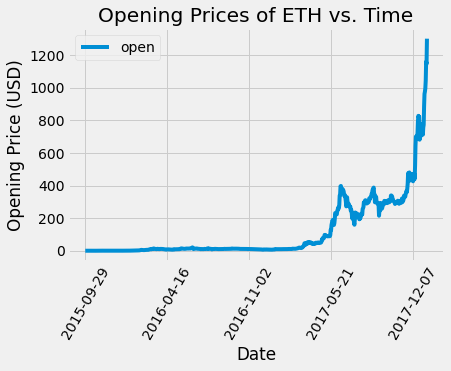

In [193]:
# Plotting ETH
eth_df.plot("date", "open")
plt.xlabel("Date")
plt.xticks(rotation=60)
plt.ylabel("Opening Price (USD)")
plt.title("Opening Prices of ETH vs. Time")

# Based on the plot of opening prices of ethereum over time I believe that there is a positive
#exponential(?) correlation between opening price and time because the line increases positively

#### Question 10

Now, calculate the correlation coefficient between the opening prices of BTC and ETH.

In [194]:
# Create a function to calculate standard units
def standard_units(x):
    "Convert any array of numbers to standard units."
    # Formula for calculating standard units
    return (x - np.average(x))/np.std(x,ddof=1)

# Find r (the correlation coefficient)
# Formulat for finding R
r = sum(standard_units(eth_df["open"]) * standard_units(btc_df["open"]))/ (len(eth_df)-1)
r

0.9250325764148283

#### Question 11
Regardless of your conclusions above, write a function `eth_predictor` which takes an opening BTC price and predicts the price of ETH. Again, it will be helpful to use the function `regression_parameters` that you defined earlier in this homework.

In [195]:
# Uses the regression_parameters function on a newly created DataFrame of opening prices of 
#BTC and ETH.
def eth_predictor(btc_price):
    """A function that takes the opening price of BTC and converts it to the opening price 
    for ETH"""
    btc_eth_open = pd.DataFrame({'x':btc_df['open'],'y':eth_df['open']})
    parameters = regression_parameters(btc_eth_open)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    transmogofried_eth = slope * btc_price + intercept
    return transmogofried_eth

#### Question 12

Now, using the `eth_predictor` you defined in the previous question, make a scatter plot with BTC prices along the x-axis and both real and predicted ETH prices along the y-axis. The color of the dots for the real ETH prices should be different from the color for the predicted ETH prices.

Hints:
* An example of such a scatter plot is generated <a href= "https://inferentialthinking.com/chapters/15/2/Regression_Line.html"> here. </a>
* Think about the table or data frame that must be produced and used to generate this scatter plot. What data should the columns represent? Based on the data that you need, how many columns should be present? Also, what should each row represent? Constructing the table or data frame will be the main part of this question; once you have this, generating the scatter plot should be straightforward as usual.

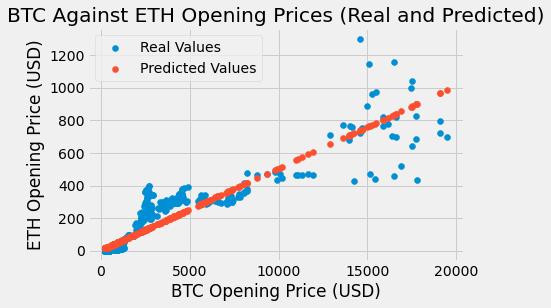

In [196]:
btc_price = btc_df["open"]
# Need a for loop here to convert the opening BTC prices into all of the ETH prices
for i in btc_price: 
    predicted_eth = eth_predictor(btc_price)
    
# Plotting the scatter plots
plt.scatter(btc_price, eth_df['open'], label='Real Values')
plt.scatter(btc_price, predicted_eth, label='Predicted Values')
plt.title('BTC Against ETH Opening Prices (Real and Predicted)')
plt.xlabel('BTC Opening Price (USD)')
plt.ylabel('ETH Opening Price (USD)')
x = plt.legend()

#### Question 13
For what values of BTC should you be more confident of your predictions? Considering the shape of the scatter plot of the true data, is the model we used reasonable? If so, what features make this model reasonable? If not, what features make it unreasonable?

*I would be more confident in my predictions if my values of BTC were anywhere within the range of 1-8,000 USD. I would conclude that the model that we used is pretty reasonable up until where BTC is worth 10,000, but after 10,000 I do not find the model very reasonable. This shows that this isn't the best model because any outliers, especially relating to the wide spread of data to the right across ETH Open Prices, this could significantly affect r and thus the line itself. A consequence of this is that the dense data to the left probably have a reduced fit.* 

#### Question 14

Now suppose you want to go the other way: to predict a BTC  price given an ETH price. Which parameters among the return values of `regression_parameters` are the same for the BTC-vs-ETH regression?

In [197]:
# Copy and paste same outline function from Q11
def btc_predictor(eth_price):
    """A function that takes the opening price of ETH and converts it to the opening price for BTC"""
    eth_btc_open = pd.DataFrame({'x':eth_df['open'],'y':btc_df['open']})
    parameters = regression_parameters(eth_btc_open)
    slope = parameters.item(1)
    intercept = parameters.item(2)
    transmogofried_btc = slope * btc_price + intercept
    return transmogofried_btc

# Same logic for plotting from Q12
eth_price = eth_df["open"]
# Need a for loop here to convert the opening BTC prices into all of the ETH prices
for i in eth_price: 
    predicted_btc = btc_predictor(eth_price)

# Check to see which of the parameters from regression_parameters ar the same
regression_parameters(pd.DataFrame({'x':eth_df['open'],'y':btc_df['open']}))

# r (correlation) only remains the same from regression_parameters


array([  0.92503258,  16.98748338, 282.30890072])

## 4. Simulations and Confidence Intervals (5 points)

In this exercise we will construct confidence intervals for the population correlation parameter and we will use simulations to assess the validity of our procedure.

Reminder:  the bootstrap technique 
* takes multiple samples 
* from the empirical distribution (the observed sample frequencies)
* of the same size as the original sample
* and uses these "noisy" artificial samples to model the distribution of sampling statistics.

The following cell contains a function that generates a dataset of sample size n from a population with correlation parameter equal to r.

In [198]:
def cor_sim(r,n):
    x = np.random.normal(0, 1, n)
    z = np.random.normal(0, 1, n)
    y = r*x + np.sqrt(1 - r**2)*z  #  Weighted sum of x and z 
    df = pd.DataFrame()
    df['X'] = x
    df['Y'] = y
    return df

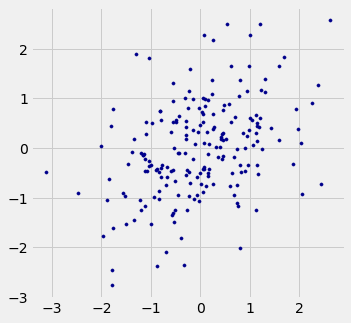

In [199]:
# run this to get a scatter plot of a simulated dataset
sim1_df=cor_sim(0.3,200)

plt.figure(figsize=(5,5))
plt.scatter(sim1_df.X, sim1_df.Y, s=10,c='darkblue')

#### Question 15

Write a function that calculates (for two given variables reflected in two columns of a data frame) a 95% confidence interval for the population correlation using bootrap sampling.  Then calculate a 95% CI for a dataset simulated with the function above.

In [203]:
# a function that outputs a 95% CI for the correlation
# input is a data frame, the name of the two columns, and number of bootstraps
# output is an array of length three containing the correlation, and also
# the left and right ends of the 95% CI


In [204]:
# run this cell to get a confidence interval for one simulated dataset

# a simulated data frame with population correlation 0.3
sim1_df=cor_sim(0.3,200)

bootstrap_slope(sim1_df, "x", "y" ,1000)

KeyError: 'x'

#### Question 16

Let us check that the bootstrap confidence bounds are correct.

Repeat this procedure (generate a random dataset) 100 times with the same specifications (n=200, r=0.3) and construct a data frame that has 100 rows (one for each simulation) and three columns:

- ObsCor: which contains the observed correlations in each simulated datasets;
- Left: contains the left ends of the 95% confidence intervals;
- Right: contains the right ends of the 95% confidence intervals.

In [ ]:
# code here
...

#### Question 17

Calculate the number of intervals that contain the population value of the correlation (r=0.3). Is this number consistent to your expectation? 

In [ ]:
# calculate number of intervals
...

*Answer here:*  
